In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv', low_memory=False)

In [3]:
df.head()
df.shape

(466285, 74)

In [4]:
#Check for the values count
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [5]:
#Remove the records which are not "Fully Paid" or "Charged Off"
# We need to consider only paid or default records.
df = df[(df.loan_status.isin(['Fully Paid','Charged Off']))]

In [6]:
df['loan_status'].value_counts()

Fully Paid     184739
Charged Off     42475
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

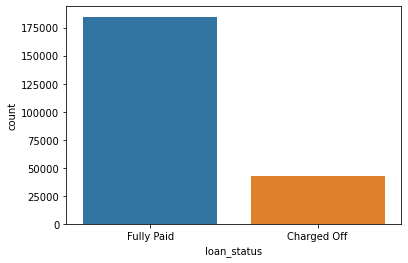

In [7]:
sns.countplot(x=df['loan_status'], data=df)

In [8]:
#Find % of NULL values in each column so based on it we can drop the column as missing values that cant be manipulated or set.
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

inq_last_12m                 100.0
verification_status_joint    100.0
annual_inc_joint             100.0
open_acc_6m                  100.0
open_il_6m                   100.0
                             ...  
initial_list_status            0.0
out_prncp                      0.0
member_id                      0.0
total_pymnt                    0.0
out_prncp_inv                  0.0
Length: 74, dtype: float64

In [9]:
df['inq_last_12m'].value_counts()

Series([], Name: inq_last_12m, dtype: int64)

In [10]:
df['inq_last_12m'].isnull().sum()

227214

In [11]:
len(df['inq_last_12m'])

227214

In [12]:
df['earliest_cr_line'].head(10)

0     Jan-85
1     Apr-99
2     Nov-01
3     Feb-96
5     Nov-04
7     Jan-07
8     Apr-04
9     Sep-04
10    Jan-98
11    Oct-89
Name: earliest_cr_line, dtype: object

In [13]:
df.drop(['id','member_id','url','desc','purpose','title','zip_code' ,'earliest_cr_line'], axis=1, inplace=True)
add_state_dummies = pd.get_dummies(df['addr_state'], drop_first=True) # drop_first will drop the first dummy column 
add_state_dummies
df = pd.concat([df.drop('addr_state', axis=1), add_state_dummies], axis=1)

In [14]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,2.272140e+05,227214.000000,227214.000000,227214.000000,99155.000000,...,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000
mean,13458.229907,13413.055203,13309.972434,13.768694,416.489963,7.203479e+04,16.364585,0.242784,0.868366,35.143533,...,0.002148,0.009084,0.076025,0.008204,0.031455,0.001681,0.023286,0.012020,0.004480,0.002385
std,8046.090690,8020.146442,8039.887843,4.383509,243.507008,5.529133e+04,7.669631,0.722587,1.075448,21.763578,...,0.046294,0.094876,0.265039,0.090202,0.174544,0.040968,0.150812,0.108973,0.066786,0.048783
min,500.000000,500.000000,0.000000,5.420000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,7200.000000,7186.038945,10.740000,239.100000,4.500000e+04,10.660000,0.000000,0.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,12000.000000,11900.000000,13.610000,365.010000,6.200000e+04,16.050000,0.000000,1.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18000.000000,18000.000000,18000.000000,16.450000,545.160000,8.600000e+04,21.790000,0.000000,1.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,29.000000,8.000000,152.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# get all the columns which don't have NULL data % <50.
keep_df = df.columns[((df.isnull().sum()/len(df))*100 < 50)].to_list()
keep_df
df = df[keep_df]
df.shape
df.describe()
df.columns.to_list()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR'

In [16]:
df.dtypes.value_counts()

uint8      49
float64    26
object     14
int64       4
dtype: int64

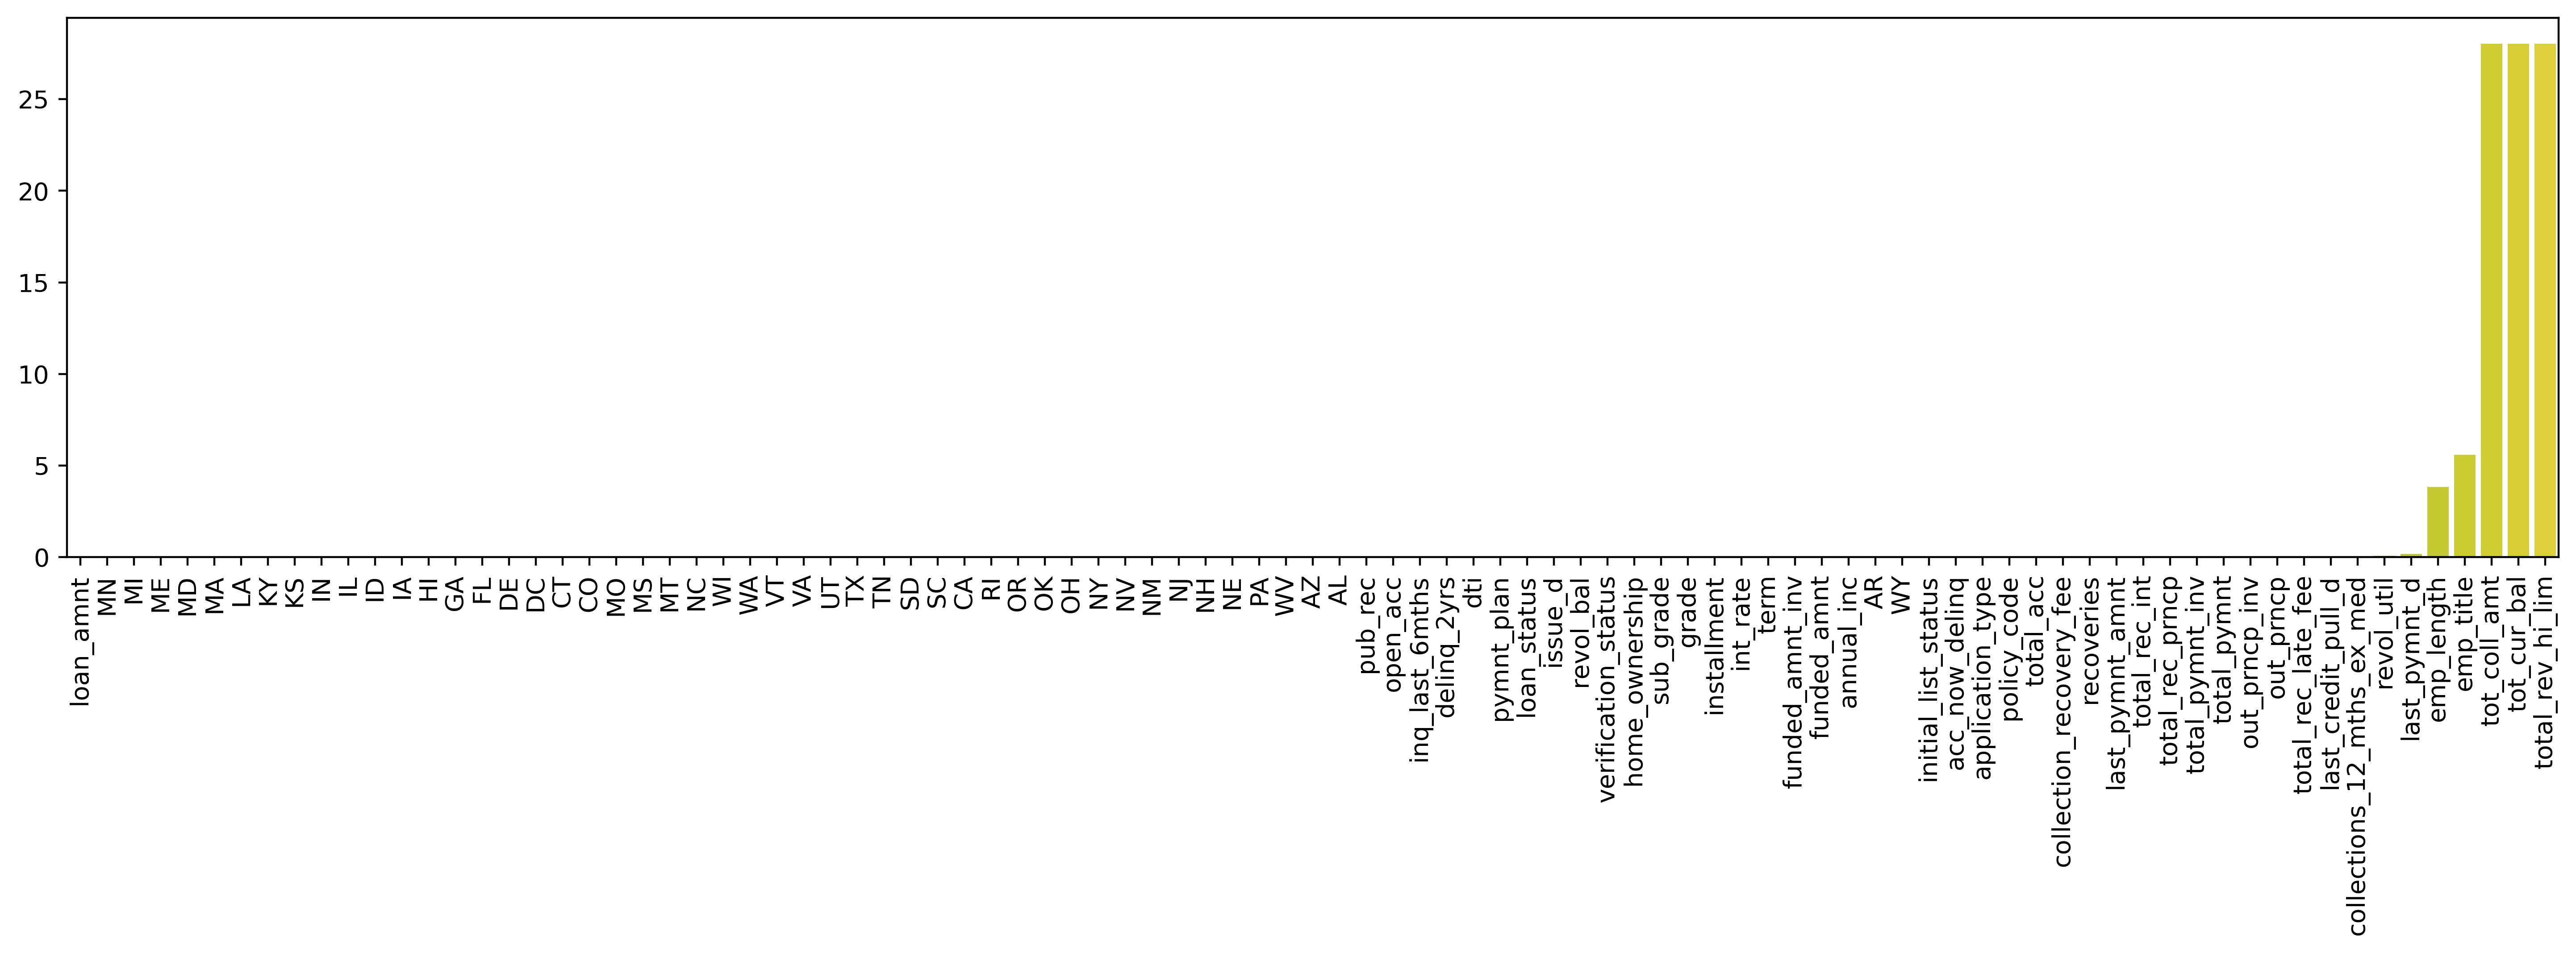

In [17]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

In [18]:
df['loan_status'] # The feature we need to predict

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
5          Fully Paid
             ...     
466276    Charged Off
466277    Charged Off
466278     Fully Paid
466281    Charged Off
466283     Fully Paid
Name: loan_status, Length: 227214, dtype: object

In [19]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
# set dummies for the values of "loan_status" and then drop the first column to get away with dummy trap
df_temp = df.copy()
df_temp['loan_status'] = pd.get_dummies(df['loan_status'], drop_first=True)
df_temp

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0,0,0,0,0,0,0,0,0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,0,0,0,0,0,0,0,0,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,...,0,0,0,0,0,0,0,0,0,0
466277,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,...,0,0,0,0,0,0,0,0,0,0
466278,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,...,0,0,0,0,1,0,0,0,0,0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,0,1,0,0,0,0,0,0,0,0


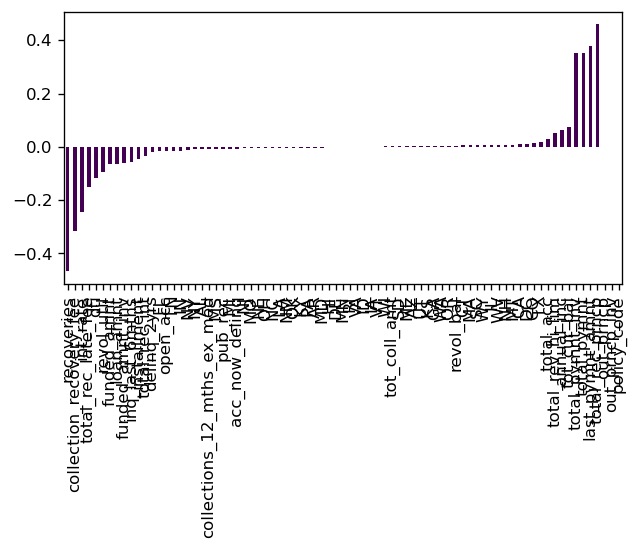

In [21]:
plt.figure(figsize=(6,3),dpi=120)
df_temp.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar', cmap='viridis') # correlation with loan_status for continuous features with loan_status feature dropped
plt.xticks(rotation=90); 

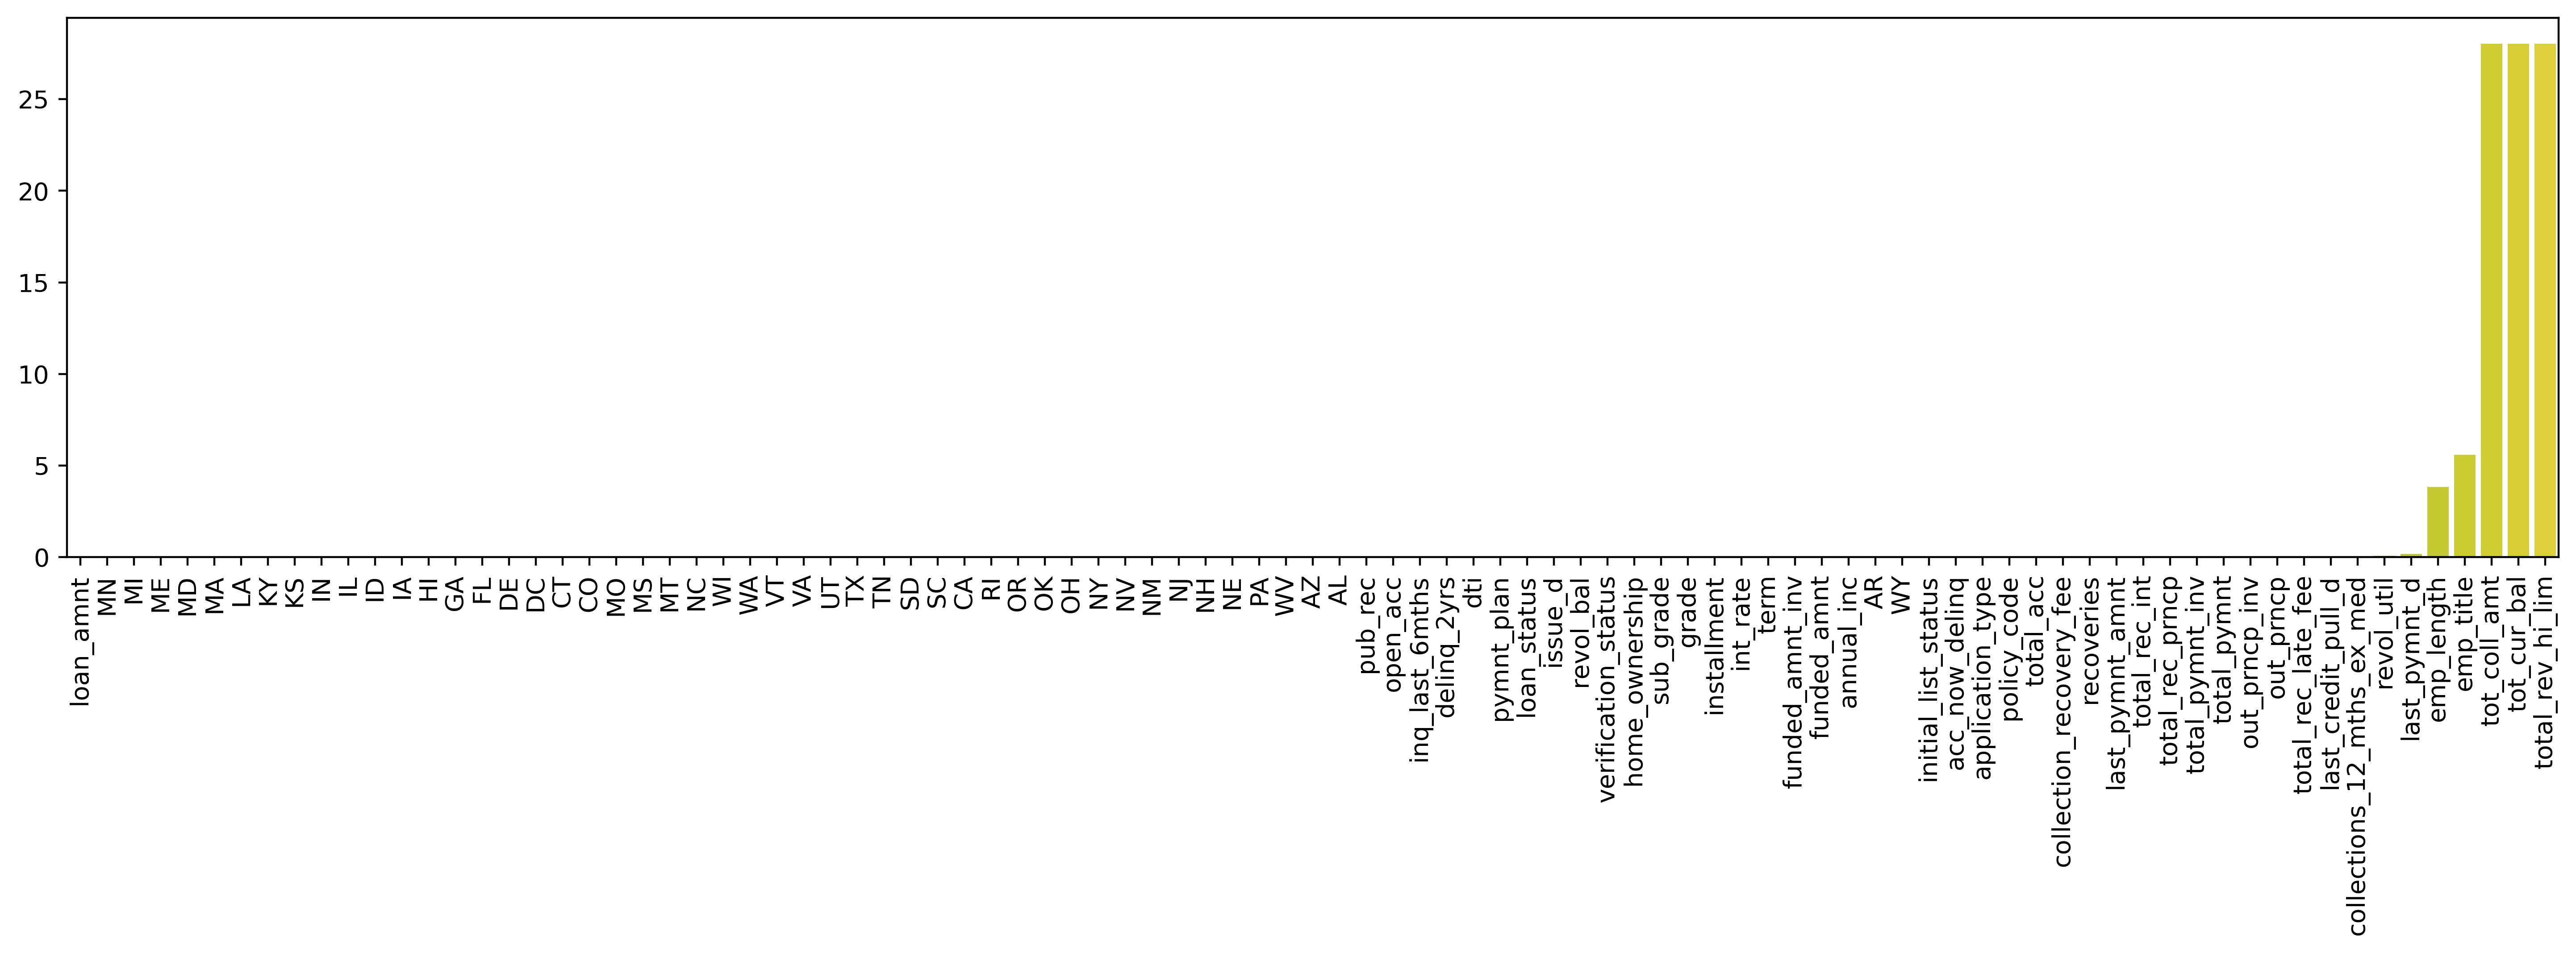

In [22]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

In [23]:
#Columns with missing values and % of missing values.
df_missing = ((df.isnull().sum()/len(df))*100)[((df.isnull().sum()/len(df))*100) > 0]
df_missing

emp_title                      5.590765
emp_length                     3.817106
revol_util                     0.081861
last_pymnt_d                   0.160201
last_credit_pull_d             0.009242
collections_12_mths_ex_med     0.024646
tot_coll_amt                  28.038765
tot_cur_bal                   28.038765
total_rev_hi_lim              28.038765
dtype: float64

In [24]:
# function to check % of missing data for a particular column.
def if_null_values(feat_name):
    if feat_name in df_missing:
        return(f"% of missing values = {df_missing[feat_name].round(2)}")
    else:
        return("No missing values")

In [25]:
if_null_values('annual_inc')

'No missing values'

In [26]:
df['annual_inc'].describe()

count    2.272140e+05
mean     7.203479e+04
std      5.529133e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.600000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

/Users/rohitkhandale/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

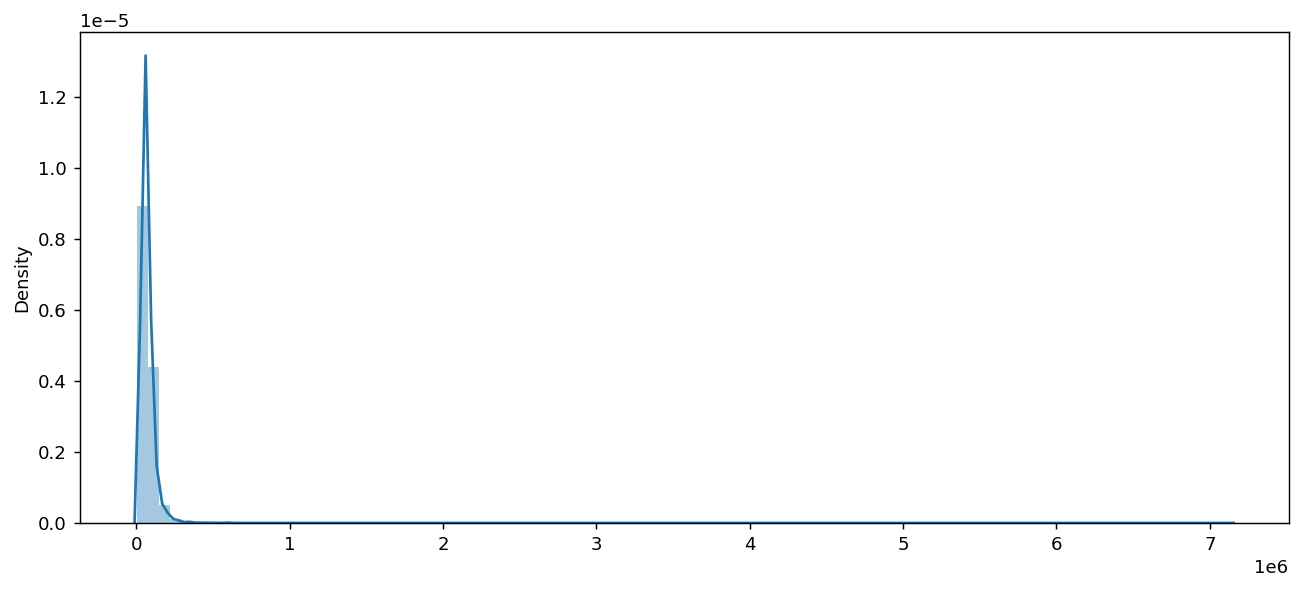

In [27]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc'], bins=100)

In [28]:
len(df[df['annual_inc'] > 250000])

1564

In [29]:
percent_of_rows_of_customers_with_annual_inc_more_than_150000 = 1564*100/len(df)
percent_of_rows_of_customers_with_annual_inc_more_than_150000

0.6883378665047049

In [30]:
df = df[df['annual_inc'] <= 250000]
len(df)

225650

/Users/rohitkhandale/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


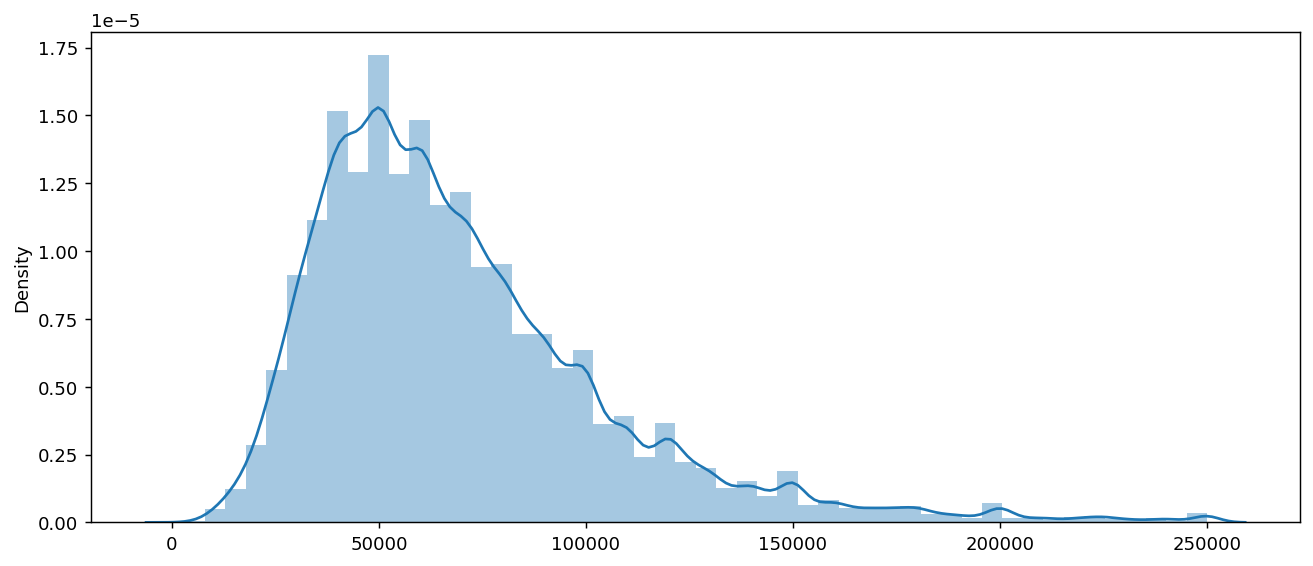

In [31]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc']);

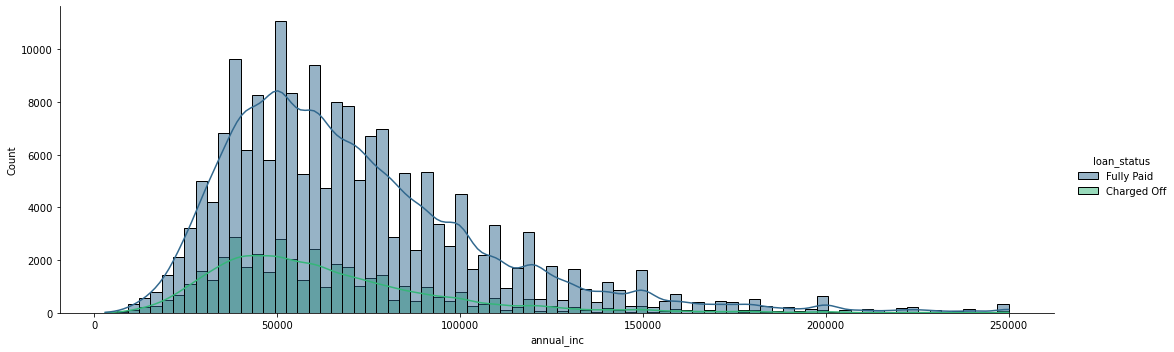

In [32]:
sns.displot(data=df, x='annual_inc', hue='loan_status', bins=80, height=5, aspect=3, kde=True, palette='viridis');

In [33]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42290.0,63408.697602,33239.376907,4080.0,40000.0,56000.0,77600.0,250000.0
Fully Paid,183360.0,71158.016744,36686.008953,3000.0,45000.0,63000.0,88000.0,250000.0


In [34]:
if_null_values('emp_length')

'% of missing values = 3.82'

In [35]:
df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

In [36]:
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

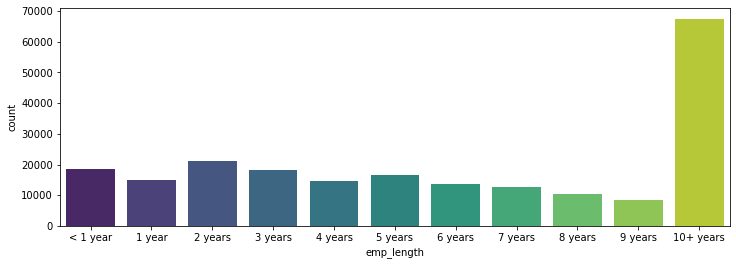

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='viridis')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

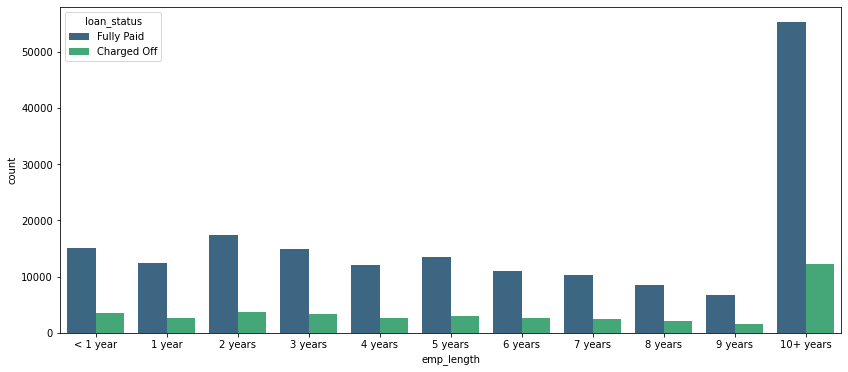

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status', palette='viridis')

In [39]:
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
percentage_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
percentage_charged_off

emp_length
1 year       18.014071
10+ years    18.226397
2 years      17.922829
3 years      18.135083
4 years      17.649075
5 years      18.317462
6 years      18.917526
7 years      19.204315
8 years      19.365019
9 years      19.481595
< 1 year     19.076165
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

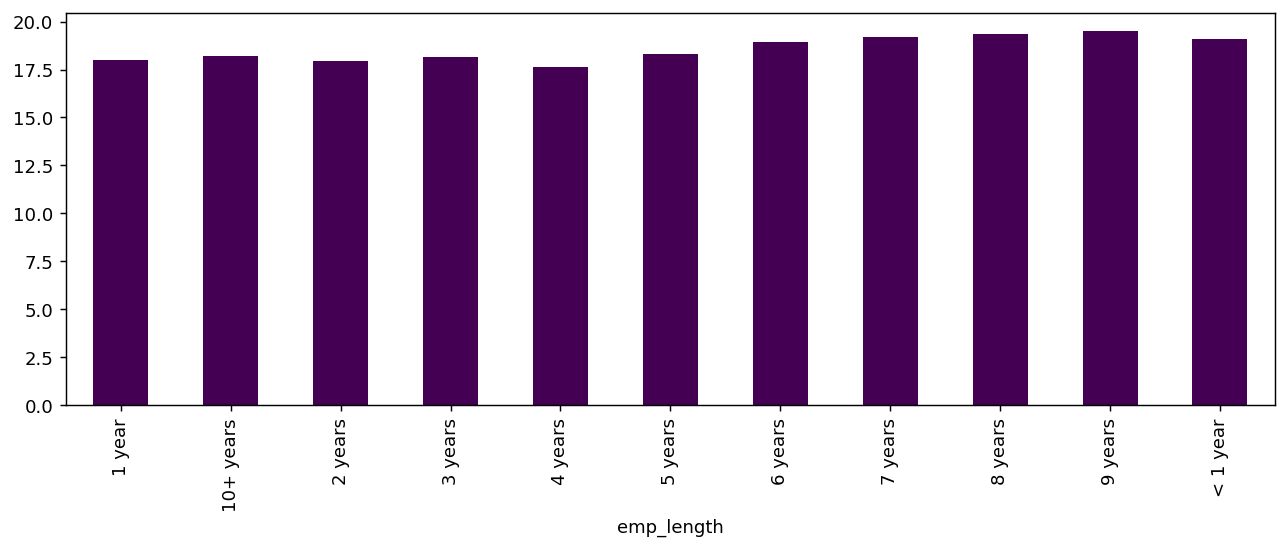

In [40]:
plt.figure(figsize=(12,4), dpi=130)
percentage_charged_off.plot(kind='bar', cmap='viridis')

In [41]:
df = df.drop('emp_length', axis=1)

In [42]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 

In [43]:
df.shape

(225650, 92)

In [44]:
if_null_values('emp_title')

'% of missing values = 5.59'

In [45]:
df['emp_title'].describe()

count      213065
unique     124330
top       Teacher
freq         1527
Name: emp_title, dtype: object

In [46]:
#There are 124330 unique values, way too many to create dummies. Hence, it is wise to drop this feature.
df = df.drop('emp_title', axis=1)

In [47]:
#check unique grade and sub_grade categories.
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [48]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

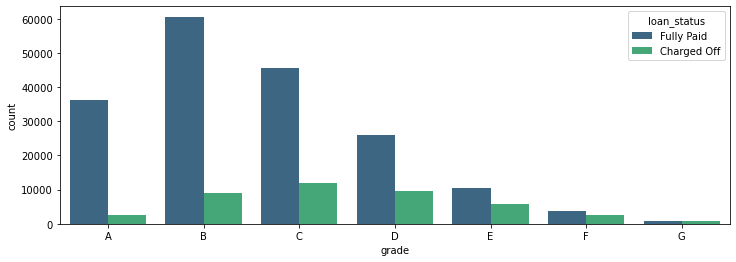

In [49]:
# Check number of customers separated by grade and based on their loan_status.
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df,hue='loan_status', order=sorted(df['grade'].unique()), palette='viridis');

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

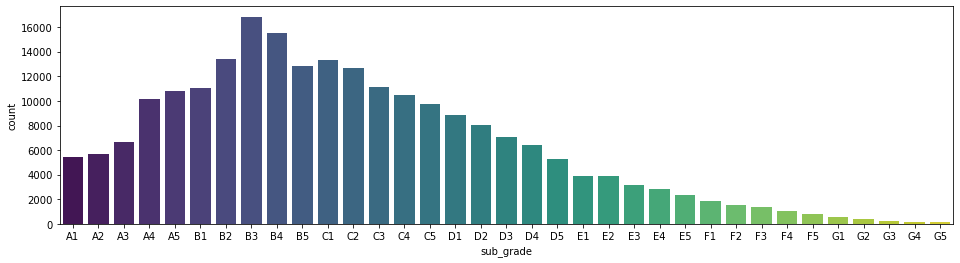

In [50]:
#Check number of customers in each sub_grade.
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

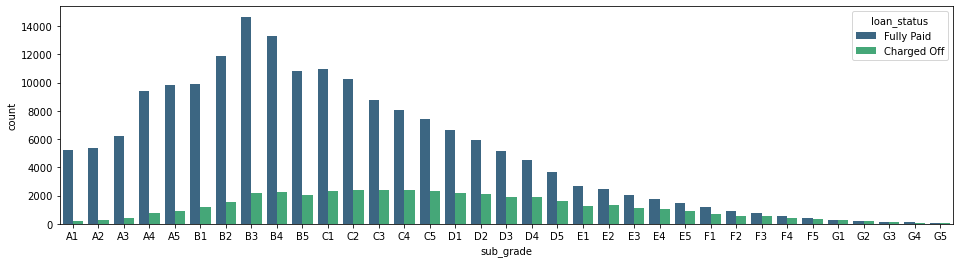

In [51]:
#Check number of customers in each sub_grade separated by loan_status
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis' ,hue='loan_status')

In [52]:
#Customers who don't pay back loan have higher grade.
#Information of 'grade' is already embedded in 'sub_grade'.
#Let's drop 'grade' feature.
df = df.drop('grade', axis=1)

In [53]:
#As sub_grade is categorical, lets create dummies for the same.
dummies_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)

In [54]:
#Concat the 'dummies_sub_grade' after dropping the original feature 'sub_grade'.
df = pd.concat([df.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

In [55]:
df.shape

(225650, 123)

In [56]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [57]:
if_null_values('home_ownership')

'No missing values'

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    110942
RENT         95583
OWN          18941
OTHER          140
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [59]:
#merge 'ANY' and 'NONE' into 'OTHER'.
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

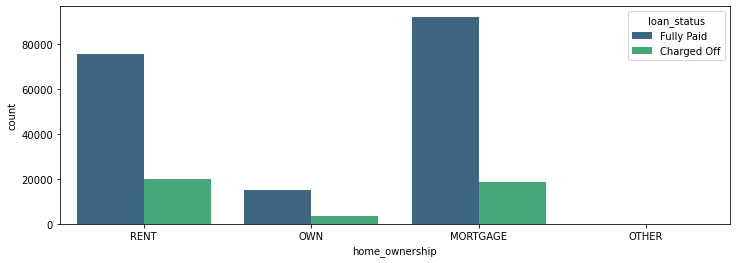

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='viridis')

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    110942
RENT         95583
OWN          18941
OTHER          184
Name: home_ownership, dtype: int64

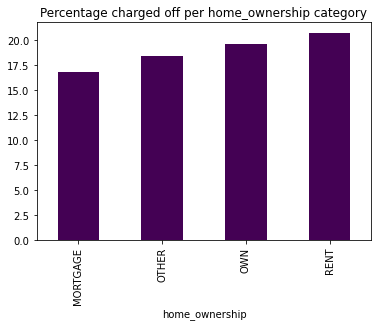

In [62]:
#Percentage charged off per home_ownership category.
charged_off = df[df['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per home_ownership category");

In [63]:
#Since there are only 4 categories in home_ownership column, we will convert it into dummies.
dummies_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)

In [64]:
#Concat the 'dummies_home_ownership' after dropping the original feature 'home_ownership'
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

In [65]:
df.shape

(225650, 125)

In [66]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

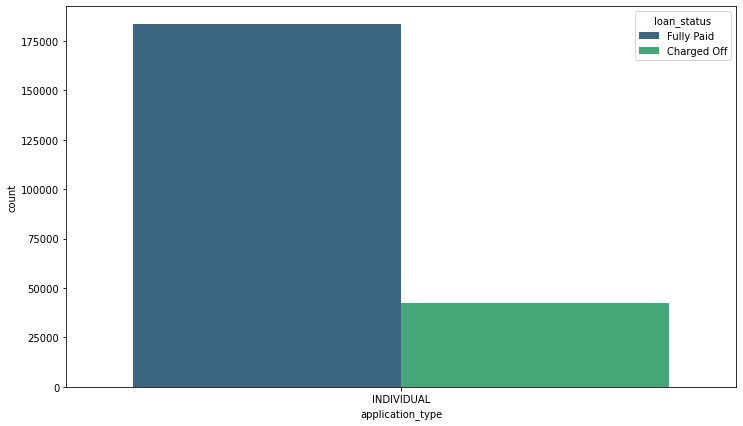

In [67]:
plt.figure(figsize=(12,7))
sns.countplot(x='application_type',data=df,hue='loan_status', palette='viridis');

In [68]:
df['int_rate'].unique()

array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
        7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 17.49, 10.59, 15.62,
       19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69, 20.62,
       20.25, 21.36, 23.22, 21.74, 22.48, 22.11, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88, 20.11,
       16.02, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37,
       17.51,  7.66, 18.62, 10.74,  5.79,  6.92, 10.  ,  9.63, 16.4 ,
       14.54, 12.68, 19.36, 13.8 , 21.59, 20.85, 19.74, 20.48, 18.99,
       21.22,  6.91,

In [69]:
if_null_values('int_rate')

'No missing values'

In [70]:
df['int_rate'].describe()

count    225650.000000
mean         13.768218
std           4.380608
min           5.420000
25%          10.740000
50%          13.610000
75%          16.400000
max          26.060000
Name: int_rate, dtype: float64

In [71]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42290.0,15.996389,4.289826,5.42,13.06,15.80,18.92,26.06
Fully Paid,183360.0,13.254314,4.238183,5.42,10.16,13.11,15.80,26.06


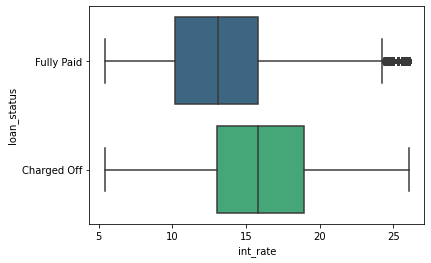

In [72]:
sns.boxplot(data=df, y='loan_status', x='int_rate', palette='viridis');

In [73]:
if_null_values('loan_amnt')

'No missing values'

In [74]:
df['loan_amnt'].describe()

count    225650.000000
mean      13384.296698
std        7983.978047
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [75]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42290.0,14467.814495,8332.278061,900.0,8000.0,12500.0,20000.0,35000.0
Fully Paid,183360.0,13134.395043,7880.376892,500.0,7000.0,11625.0,18000.0,35000.0


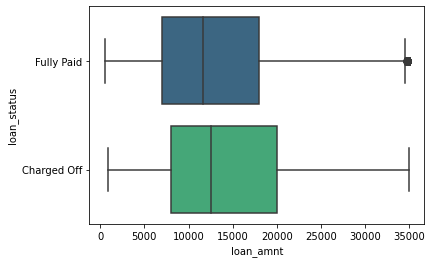

In [76]:
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis');

In [77]:
df['total_acc']

0          9.0
1          4.0
2         10.0
3         37.0
5         12.0
          ... 
466276    26.0
466277    33.0
466278    24.0
466281    30.0
466283    27.0
Name: total_acc, Length: 225650, dtype: float64

In [78]:
if_null_values('total_acc')

'No missing values'

In [79]:
df['total_acc'].describe()

count    225650.000000
mean         24.765198
std          11.596503
min           2.000000
25%          16.000000
50%          23.000000
75%          32.000000
max         150.000000
Name: total_acc, dtype: float64

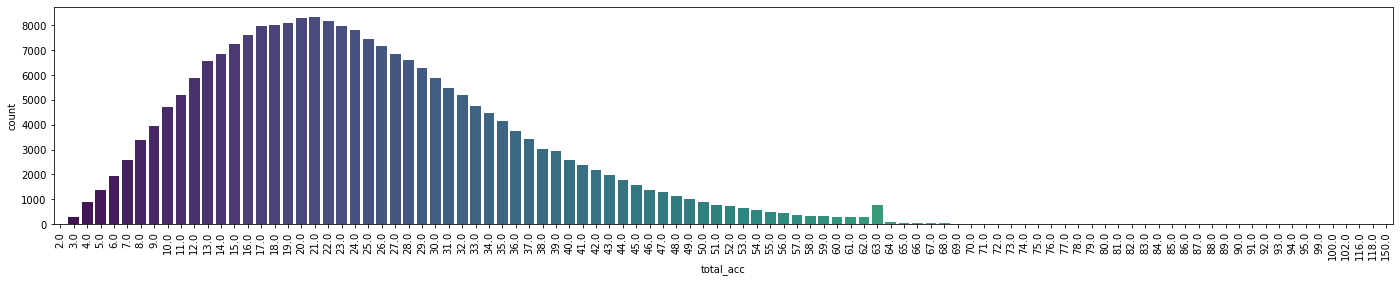

In [80]:
#countplot of number of customers with different 'total_acc'.
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

In [81]:
#Since there are some outliers, we will drop rows with customers with 'total_acc' > 63.
df = df[df['total_acc'] < 64]

In [82]:
df.shape

(225216, 125)

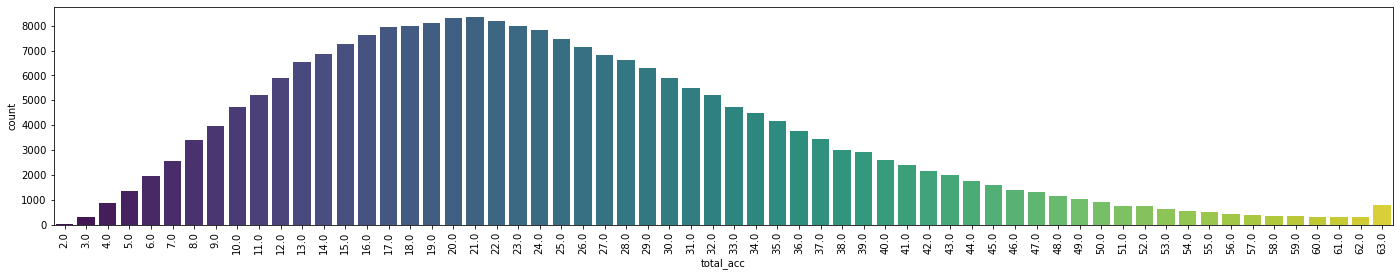

In [83]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

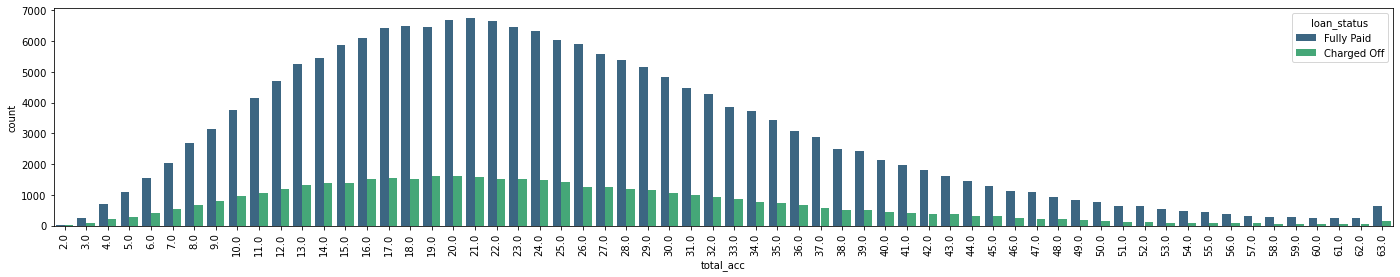

In [84]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', hue='loan_status', palette='viridis');

In [85]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42222.0,24.033963,11.275973,2.0,16.0,22.0,31.0,63.0
Fully Paid,182994.0,24.821940,11.440040,2.0,16.0,23.0,32.0,63.0


In [86]:
#Total current balance of all accounts.
df['tot_cur_bal']

0              NaN
1              NaN
2              NaN
3              NaN
5              NaN
            ...   
466276    116995.0
466277     42592.0
466278     10170.0
466281    221830.0
466283    591610.0
Name: tot_cur_bal, Length: 225216, dtype: float64

In [87]:
if_null_values('tot_cur_bal')

'% of missing values = 28.04'

In [88]:
df['tot_cur_bal'].describe()

count    1.619810e+05
mean     1.342535e+05
std      1.405442e+05
min      0.000000e+00
25%      2.782600e+04
50%      7.899700e+04
75%      2.054980e+05
max      3.610743e+06
Name: tot_cur_bal, dtype: float64

In [89]:
df['tot_cur_bal'].isnull().sum()

63235

In [90]:
#Let's fill null values with mean
mean_val = df['tot_cur_bal'].describe()['mean']
mean_val
df["tot_cur_bal"].fillna(mean_val, inplace = True)

In [91]:
df['tot_cur_bal'].isnull().sum()

0

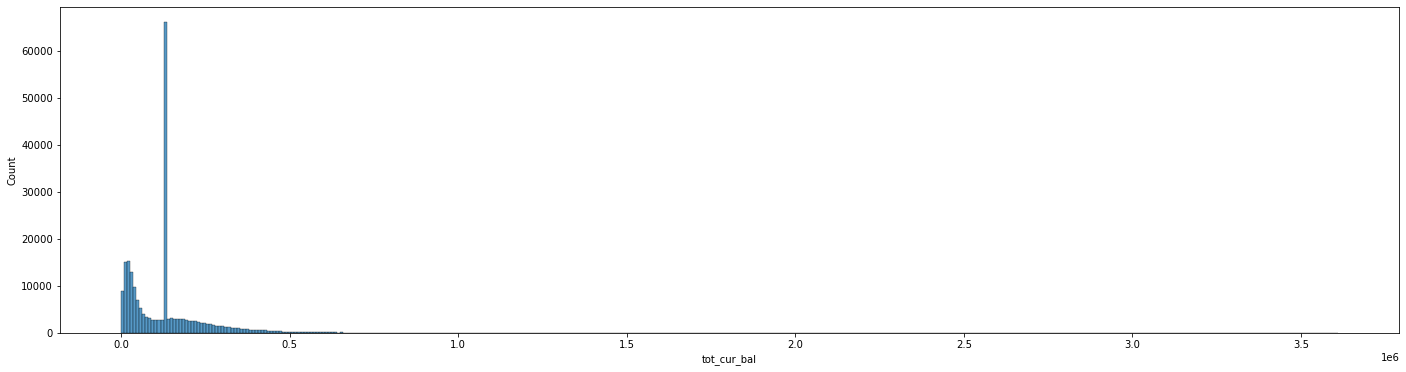

In [92]:
#Let's plot the distribution of 'tot_cur_bal' of the customers.
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=400, palette='viridis');

In [93]:
df = df[df['tot_cur_bal'] < 1000001]

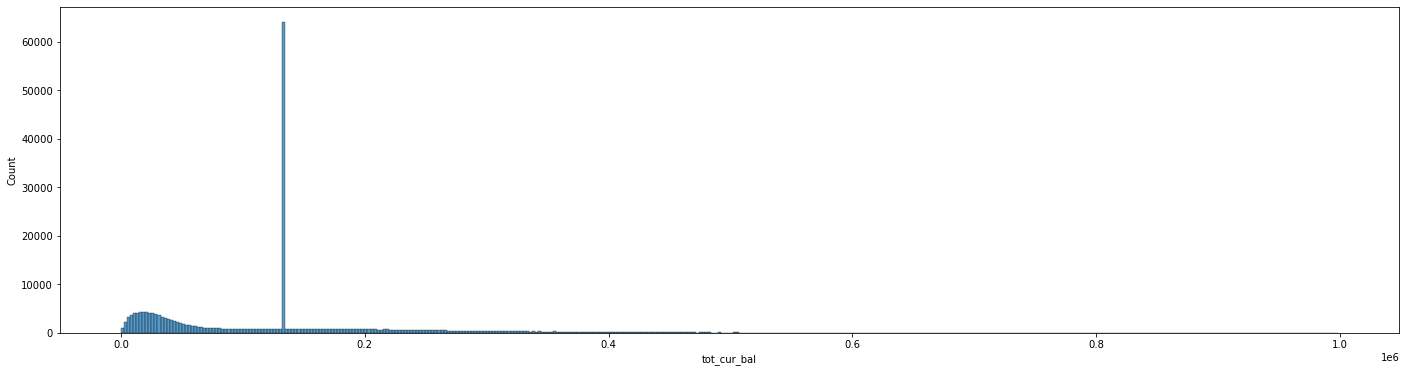

In [94]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=400, palette='viridis');

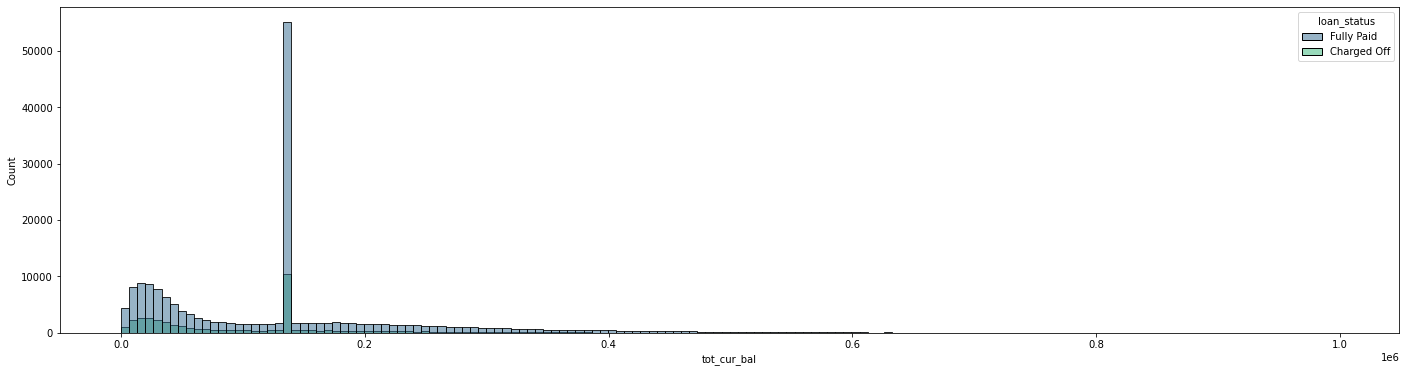

In [95]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, hue='loan_status', palette='viridis');

In [96]:
df.groupby('loan_status')['tot_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42211.0,117674.954073,105493.978715,0.0,32613.5,125267.000000,134253.464647,993983.0
Fully Paid,182885.0,137375.043150,118487.429657,0.0,41890.0,134253.464647,161702.000000,998686.0


In [97]:
df.shape

(225096, 125)

In [98]:
#The number of open credit lines in the borrower's credit file.
if_null_values('open_acc')

'No missing values'

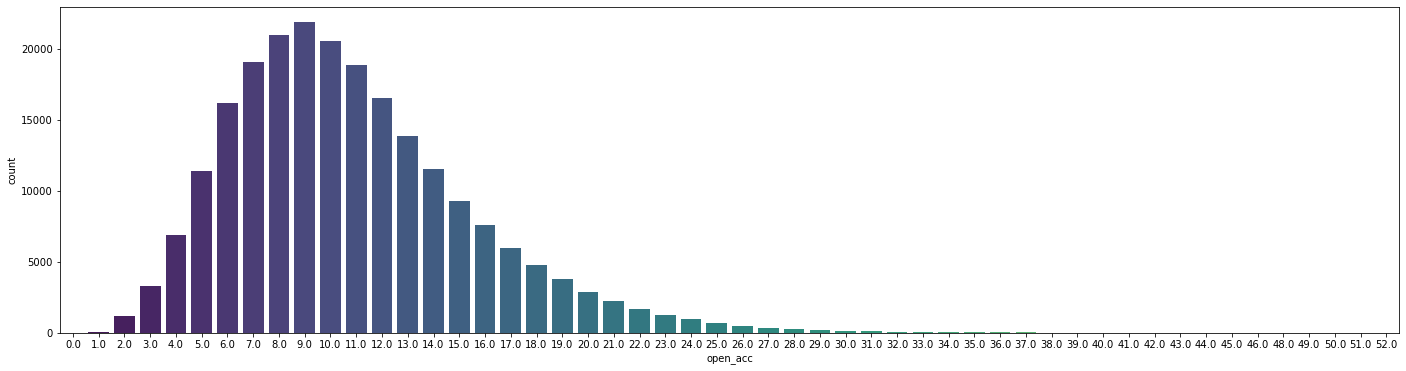

In [99]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', palette='viridis');

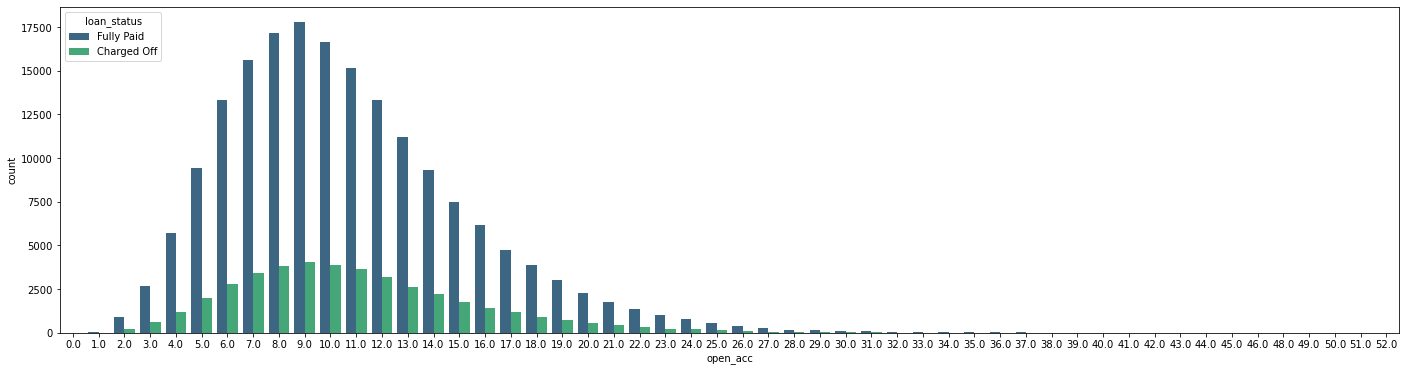

In [100]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', hue='loan_status', palette='viridis');

In [101]:
df.groupby('loan_status')['open_acc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42211.0,10.964701,4.827509,0.0,8.0,10.0,14.0,45.0
Fully Paid,182885.0,10.753348,4.718760,0.0,7.0,10.0,13.0,52.0


In [102]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status',
       ...
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object', length=125)

In [103]:
#The number of payments on the loan. Values are in months and can be either 36 or 60.
if_null_values('term')

'No missing values'

In [104]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [105]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

<AxesSubplot:xlabel='term', ylabel='count'>

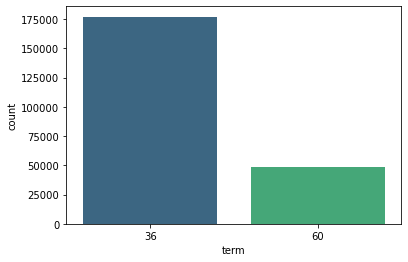

In [106]:
sns.countplot(data=df, x='term', palette='viridis')

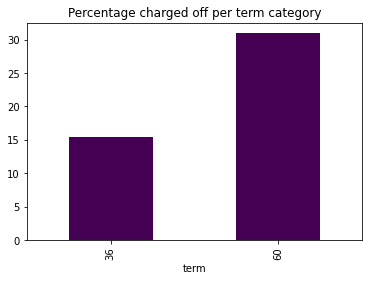

In [107]:
#We will convert the feature into dummies.
charged_off = df[df['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per term category");

In [108]:
dummies_term = pd.get_dummies(df['term'], drop_first=True)

In [109]:
pd.concat([df.drop('term', axis=1), dummies_term], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,...,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,60
0,5000,5000,4975.0,10.65,162.87,24000.0,Verified,Dec-11,Fully Paid,n,...,0,0,0,0,0,0,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30000.0,Source Verified,Dec-11,Charged Off,n,...,0,0,0,0,0,0,0,0,1,1
2,2400,2400,2400.0,15.96,84.33,12252.0,Not Verified,Dec-11,Fully Paid,n,...,0,0,0,0,0,0,0,0,1,0
3,10000,10000,10000.0,13.49,339.31,49200.0,Source Verified,Dec-11,Fully Paid,n,...,0,0,0,0,0,0,0,0,1,0
5,5000,5000,5000.0,7.90,156.46,36000.0,Source Verified,Dec-11,Fully Paid,n,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,18.25,217.65,37536.0,Verified,Jan-14,Charged Off,n,...,0,0,0,0,0,0,0,0,0,1
466277,18000,18000,17975.0,7.90,563.23,90000.0,Verified,Jan-14,Charged Off,n,...,0,0,0,0,0,0,0,0,1,0
466278,10000,10000,10000.0,18.25,362.78,42000.0,Source Verified,Jan-14,Fully Paid,n,...,0,0,0,0,0,0,0,0,1,0
466281,22000,22000,22000.0,19.97,582.50,78000.0,Verified,Jan-14,Charged Off,n,...,0,0,0,0,0,0,0,0,0,1


In [110]:
#Total credit revolving balance.
if_null_values('revol_bal')

'No missing values'

In [111]:
len(df['revol_bal'].unique())

44828

<AxesSubplot:xlabel='revol_bal', ylabel='loan_status'>

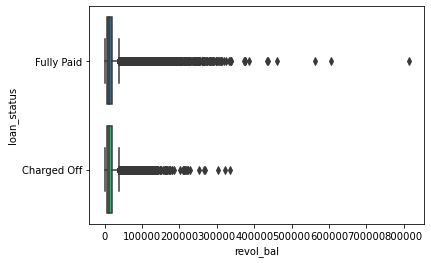

In [112]:
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

In [113]:
#There are some outliers. Let's first check how many rows are there with 'revol_bal' > $100000.
len(df[df['revol_bal'] > 100000])

1043

In [114]:
len(df[df['revol_bal'] > 100000]) * 100 / len(df)

0.46335785620357534

In [115]:
df = df[df['revol_bal'] < 100001]

In [116]:
df.shape

(224053, 125)

In [117]:
df['revol_bal'].describe()

count    224053.000000
mean      14152.084065
std       12274.484908
min           0.000000
25%        5888.000000
50%       10894.000000
75%       18723.000000
max       99967.000000
Name: revol_bal, dtype: float64

In [118]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42073.0,14316.930526,11877.935689,0.0,6263.0,11307.0,18913.0,99892.0
Fully Paid,181980.0,14113.972266,12364.074482,0.0,5804.0,10804.0,18680.0,99967.0


In [119]:
#Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
if_null_values('revol_util')

'% of missing values = 0.08'

In [120]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [121]:
df['revol_util'].isnull().sum()

0

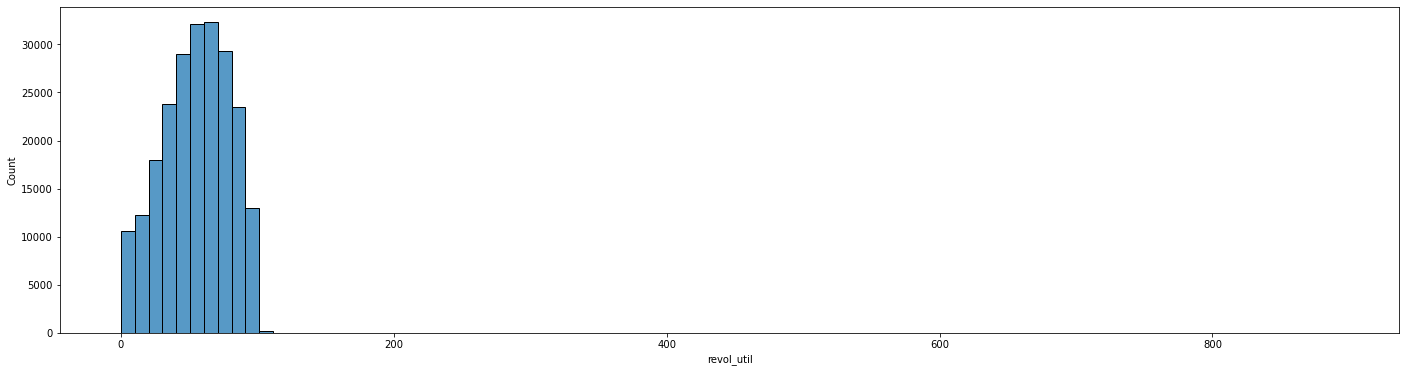

In [122]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

In [123]:
df = df[df['revol_util'] < 150] #outliers

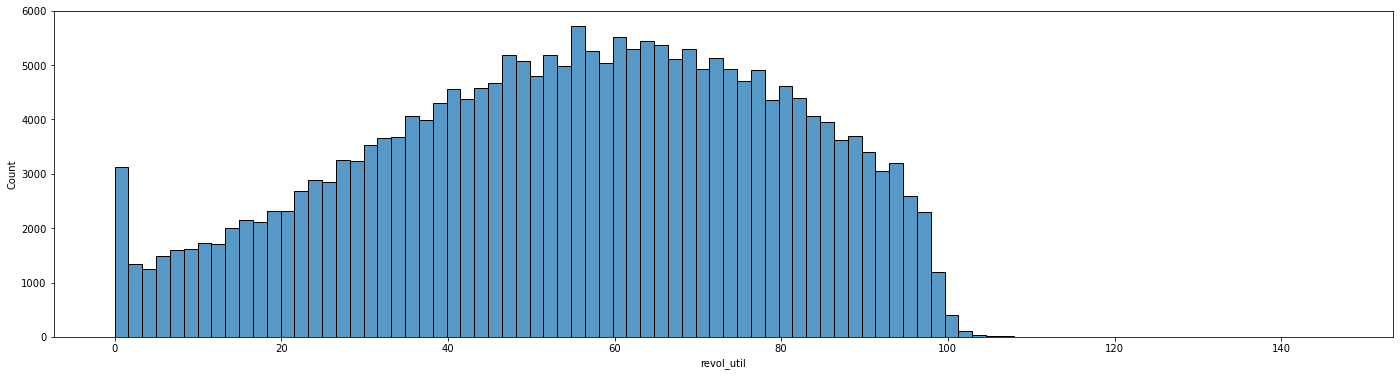

In [124]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

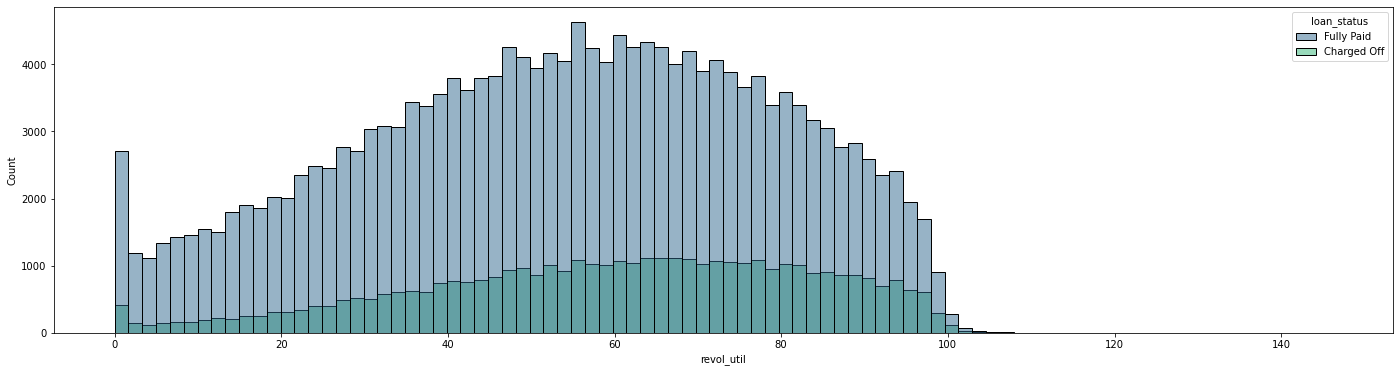

In [125]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, hue='loan_status', palette='viridis');

<AxesSubplot:xlabel='revol_util', ylabel='loan_status'>

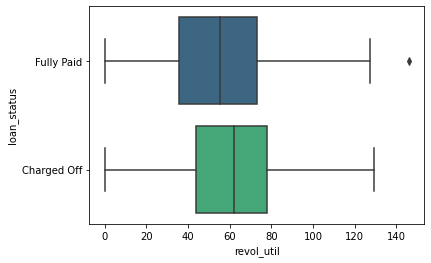

In [126]:
sns.boxplot(data=df, y='loan_status', x='revol_util', palette='viridis')

In [127]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42073.0,59.671259,23.321969,0.0,43.7,61.9,78.1,129.4
Fully Paid,181977.0,53.715144,24.725055,0.0,35.7,55.2,73.2,146.1


In [128]:
#Indicates if income was verified or not verified, or if the income source was verified.
if_null_values('verification_status')

'No missing values'

In [129]:
df['verification_status'].value_counts()

Verified           83117
Not Verified       78710
Source Verified    62223
Name: verification_status, dtype: int64

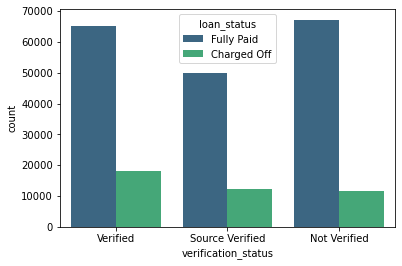

In [130]:
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='viridis');

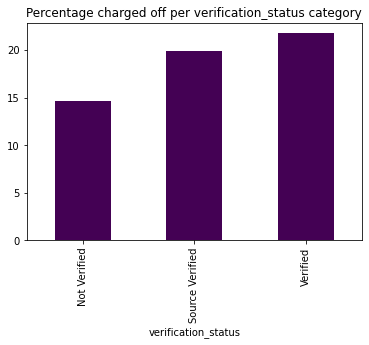

In [131]:
#Let's check percentage charged off per initial_list_status category.
charged_off = df[df['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per verification_status category");


In [132]:
#Let's create dummy variables for this feature.
dummies_verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1), dummies_verification_status], axis=1)

In [133]:
#All features are done, except the feature we want to predict. Let us map the contents in the feature, i.e., 'Fully Paid' and 'Charged Off' to boolean values.
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [134]:
df['loan_status']

0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_status, Length: 224050, dtype: int64

In [135]:
df['loan_status']

0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_status, Length: 224050, dtype: int64

In [136]:
df.dtypes.value_counts()

uint8      88
float64    26
int64       6
object      6
dtype: int64

In [137]:
# remove the object data type
df = df.select_dtypes(exclude=['object'])
df.dtypes.value_counts()

uint8      88
float64    26
int64       6
dtype: int64

In [138]:
# Scaling and Test Train split
df.shape

(224050, 120)

In [139]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print(df.shape)

(161067, 120)


In [140]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [143]:
#Scaling

In [145]:
np.any(np.isnan(X_train))

False

In [146]:
np.all(np.isfinite(X_train))

True

In [147]:
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(136906, 119) (24161, 119) (136906,) (24161,)


In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
# Random Forests

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)


In [151]:
rf.score(X_train,y_train)

1.0

In [152]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4701
           1       1.00      1.00      1.00     19460

    accuracy                           1.00     24161
   macro avg       1.00      1.00      1.00     24161
weighted avg       1.00      1.00      1.00     24161



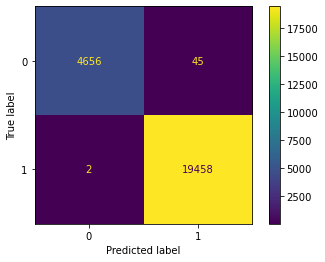

In [153]:
plot_confusion_matrix(rf,X_test,y_test)